## The Sparks Foundation

### Task 2: Prediction using Unsupervised ML

#### Predicting the optimum number of clusters and represent it visually.

#### Created by: Vivek Mahale

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Sample Dataset: https://bit.ly/3kXTdox

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

### Viewing the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
x=df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y=df['Species'].values

[]

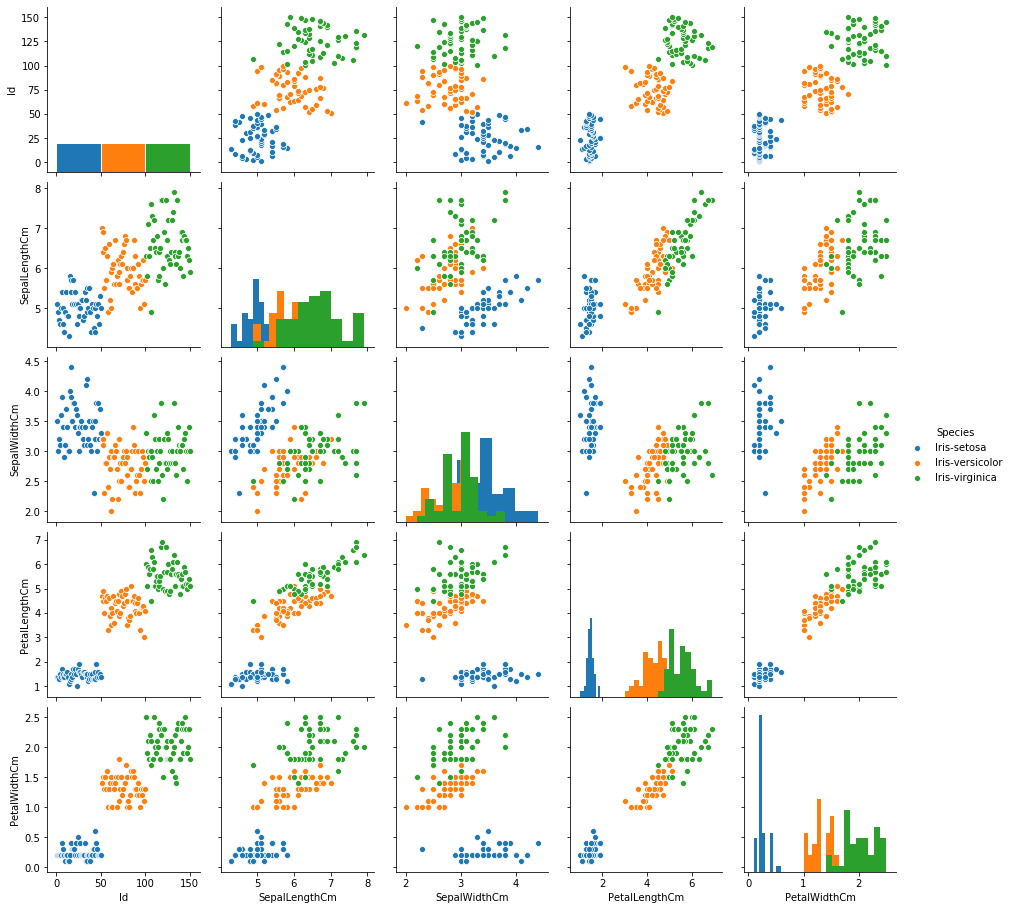

In [9]:
sns.pairplot(df,hue='Species',diag_kind='hist')
plt.plot()

[]

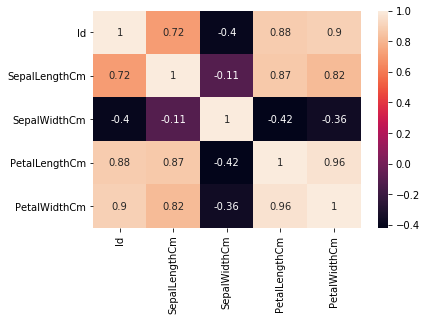

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.plot()

### Elbow method to find the optimal number of clusters

In [11]:
from sklearn.cluster import KMeans
Range=range(1,10)
Sum_of_squared_errors=[]

In [12]:
for i in Range:
    km=KMeans(n_clusters=i)
    km.fit(x)
    Sum_of_squared_errors.append(km.inertia_)

Text(0, 0.5, 'SSE')

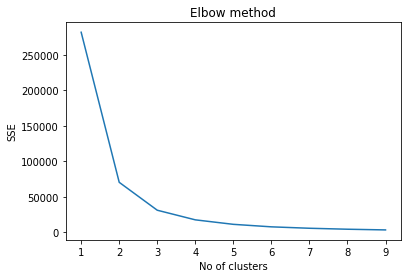

In [13]:
plt.plot(range(1, 10), Sum_of_squared_errors)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('SSE')

From point 3 onwards, the graph becomes almost constant, so the required value of the number of the clusters from the above graph is 3.

#### Therefore, optimal number of clusters = 3

### K-means clustering with number of clusters = 3

In [14]:
kmeans_3=KMeans(n_clusters=3)
kmeans_3.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
print(kmeans_3.cluster_centers_)

[[ 25.           5.00612245   3.42040816   1.46530612   0.24489796]
 [125.           6.57058824   2.97058824   5.52352941   2.01176471]
 [ 74.5          5.922        2.78         4.206        1.304     ]]


In [16]:
predicted_clusters=kmeans_3.fit_predict(x)

In [17]:
predicted_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Visualization of Clustering

<function matplotlib.pyplot.show(*args, **kw)>

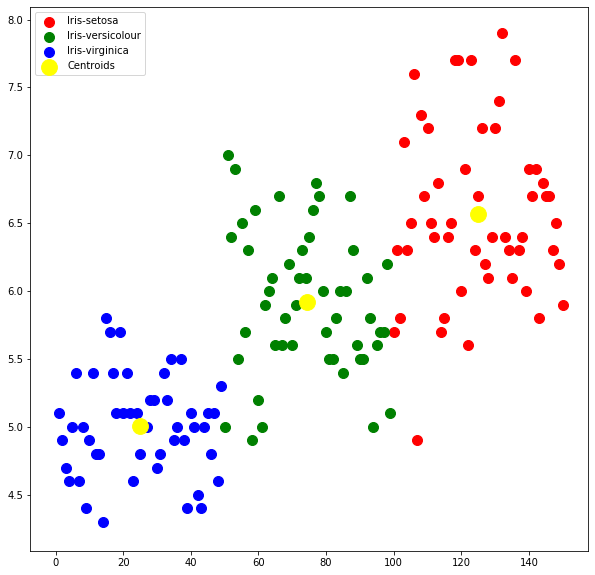

In [18]:
plt.rcParams["figure.figsize"]=10,10
plt.scatter(x[predicted_clusters==0,0],x[predicted_clusters==0,1],s=100,c='red',label='lris-setosa')
plt.scatter(x[predicted_clusters==1,0],x[predicted_clusters==1,1],s=100,c='green',label='lris-versicolour')
plt.scatter(x[predicted_clusters==2,0],x[predicted_clusters==2,1],s=100,c='blue',label='lris-virginica')

plt.scatter(kmeans_3.cluster_centers_[:,0],kmeans_3.cluster_centers_[:,1],s=250,c='yellow',label='Centroids')
plt.legend()
plt.show